# Import Neessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
from collections import Counter

warnings.simplefilter(action='ignore')

# Load Data

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
ham=df.Category=='ham'
ham.sum()

4825

In [7]:
spam=df.Category=='spam'
spam.sum() #imbalance in the data

747

In [8]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

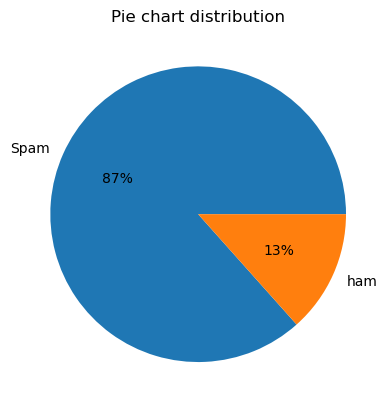

In [10]:
plt.pie(x=df['spam'].value_counts(),labels=['Spam','ham'],autopct='%1.0f%%')
plt.title('Pie chart distribution')
plt.show()

In [11]:
count1 = Counter(" ".join(df[df['Category']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['Category']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

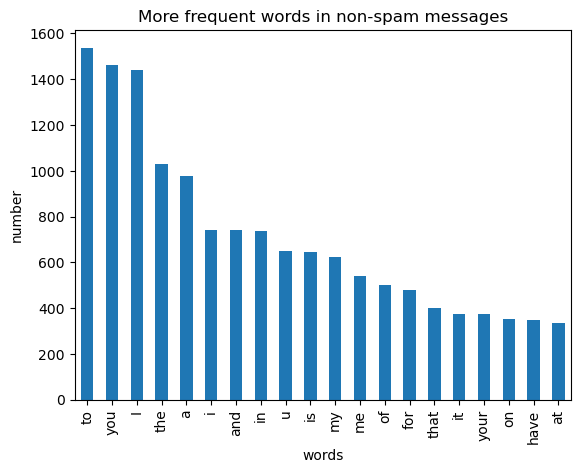

In [12]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

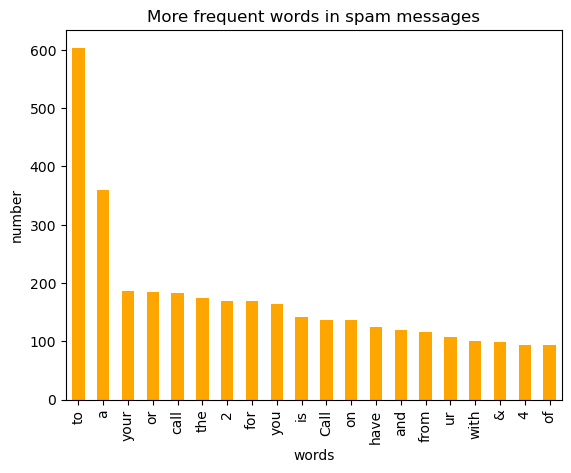

In [13]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [14]:
# We can see here most of the words are common words so for that we need to surpress these value so we use tfidf vectorizer instead of bag of words (or) Count Vectorizer

In [15]:
from wordcloud import WordCloud

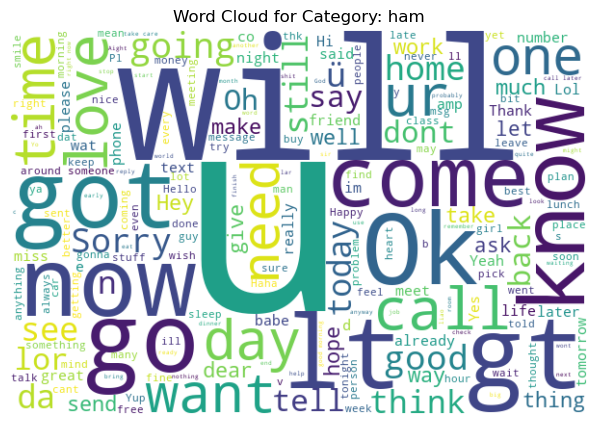

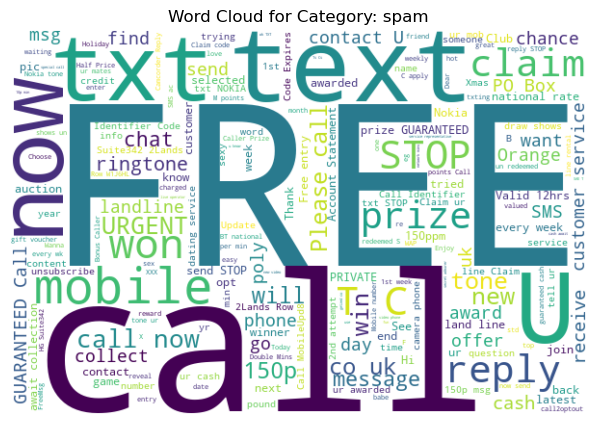

In [16]:
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'])
    
   
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

#### clearly we can see the imbalance in the dataset

# Text Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(df['Message'])
Y = df['spam']


In [18]:
dir(vect)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',

In [19]:
vect.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [20]:
print(X)

  (0, 8320)	0.1824010162830269
  (0, 1079)	0.32645117023873077
  (0, 3611)	0.15304155020494284
  (0, 7690)	0.15550627816331294
  (0, 2057)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 4497)	0.2757872678027423
  (0, 8544)	0.2208188335194995
  (0, 3651)	0.18033180630708256
  (0, 1763)	0.2757872678027423
  (0, 4110)	0.10707657674366397
  (0, 5567)	0.15636623031957597
  (0, 1313)	0.24417482890859651
  (0, 2334)	0.25281395947472957
  (0, 5954)	0.25533539230157154
  (0, 4370)	0.32645117023873077
  (0, 8080)	0.23000344108357726
  (0, 3567)	0.1478647506898016
  (1, 5563)	0.5466243141314314
  (1, 8446)	0.43162957585464123
  (1, 4338)	0.5236804332035243
  (1, 4533)	0.4083258549263009
  (1, 5534)	0.2718944069420321
  (2, 77)	0.23031755640837923
  (2, 1166)	0.1655500619657908
  :	:
  (5570, 1798)	0.28297500390378505
  (5570, 3485)	0.27533078711486225
  (5570, 2901)	0.24405689679889953
  (5570, 7095)	0.20538337055860154
  (5570, 1790)	0.13631002689236146
  (5570, 8116)	0.208848789326782

# Imbalance in the Dataset

### Sampling Minority class using SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [23]:
print(X_resampled)

  (0, 8320)	0.1824010162830269
  (0, 1079)	0.32645117023873077
  (0, 3611)	0.15304155020494284
  (0, 7690)	0.15550627816331294
  (0, 2057)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 4497)	0.2757872678027423
  (0, 8544)	0.2208188335194995
  (0, 3651)	0.18033180630708256
  (0, 1763)	0.2757872678027423
  (0, 4110)	0.10707657674366397
  (0, 5567)	0.15636623031957597
  (0, 1313)	0.24417482890859651
  (0, 2334)	0.25281395947472957
  (0, 5954)	0.25533539230157154
  (0, 4370)	0.32645117023873077
  (0, 8080)	0.23000344108357726
  (0, 3567)	0.1478647506898016
  (1, 5563)	0.5466243141314314
  (1, 8446)	0.43162957585464123
  (1, 4338)	0.5236804332035243
  (1, 4533)	0.4083258549263009
  (1, 5534)	0.2718944069420321
  (2, 77)	0.23031755640837923
  (2, 1166)	0.1655500619657908
  :	:
  (9649, 5637)	0.15686242387096605
  (9649, 5913)	0.1597939488943781
  (9649, 297)	0.1983749267081394
  (9649, 6443)	0.2435136448321249
  (9649, 1518)	0.20753672277699955
  (9649, 3684)	0.19183356126293502
 

In [24]:
y_resampled.shape

(9650,)

# Train_Test_split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7237, 8709), (2413, 8709), (7237,), (2413,))

# Model Buiding  

### NaiveBayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1)
model.fit(X_train,y_train)

MultinomialNB(alpha=1)

In [28]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_X_y',
 '_check_alpha',
 '_check_feature_names',
 '_check_n_features',
 '_count',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_counters',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_class_log_prior',
 '_update_feature_log_prob',
 '_validate_data',
 '_validate_params',
 'alpha',
 'class_count_',
 'class_log_prior_',
 'class_prior',
 'classes_',
 'feature_count_',
 'feature_log_prob_',
 'fit',
 'fit_prior

In [29]:
model.score(X_test,y_test)

0.9838375466224617

# KFold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(MultinomialNB(alpha=10), X_train,y_train,cv=3)

array([0.96891836, 0.96932007, 0.97139303])

In [32]:
cross_val_score(MultinomialNB(alpha=5), X_train,y_train,cv=3)

array([0.97969333, 0.97885572, 0.97678275])

In [33]:
cross_val_score(MultinomialNB(alpha=1), X_train,y_train,cv=3)

array([0.98839619, 0.98797678, 0.98383085])

In [34]:
# we get a good accuracy when alpha=1

# Hyper_Parameter_Tuning 

### Lets check with some other Models

#### BernoulliNB  
#### ComplementNB
#### GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,ComplementNB
from sklearn.model_selection import GridSearchCV

In [36]:
models={
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{
        }
    },
        
     'BernoulliNB':{
         'model':BernoulliNB(),
         'params':{
             'alpha' : [1,5,10],
            
         }
     },
     'ComplementNB':{
         'model':ComplementNB(),
         'params':{
             'alpha' : [1,5,10],
             'force_alpha':[True,False,'warn']
         }
     }
      
}

In [37]:
def find_best_model(x,y,models):
    scores=[]
    for model_name,config in models.items():
        grid_search=GridSearchCV(config['model'],config['params'],cv=5,return_train_score=False)
        grid_search.fit(x,y)
        scores.append(
            {
                'model':model_name,
                'best_score':grid_search.best_score_,
                'best_params':grid_search.best_params_
            }
        )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [38]:
find_best_model(X_train.toarray(),y_train,models)

,model,best_score,best_params
0,GaussianNB,0.944730,{}
1,BernoulliNB,0.987426,{'alpha': 1}
2,ComplementNB,0.987149,"{'alpha': 1, 'force_alpha': True}"


In [39]:
# we get a good accuracy in MultinomialNB so we can use that for our model

# Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
y_pred=model.predict(X_test)
y_true=np.array(y_test)

In [42]:
cm=confusion_matrix(y_true,y_pred)

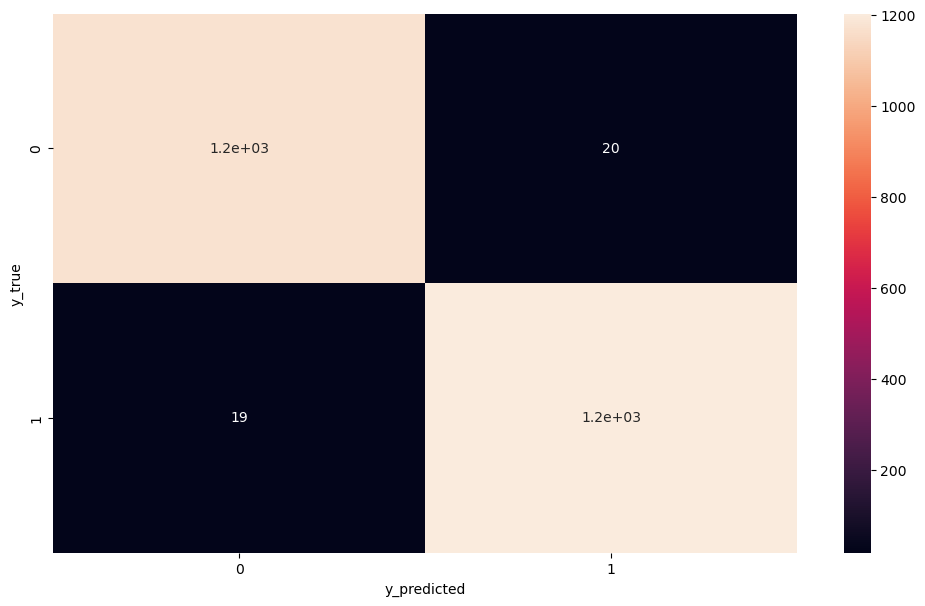

In [43]:
plt.figure(figsize=(12,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

# Classification Report

In [44]:
from sklearn.metrics import classification_report

In [45]:
clf_rep=classification_report(y_true,y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1191
           1       0.98      0.98      0.98      1222

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



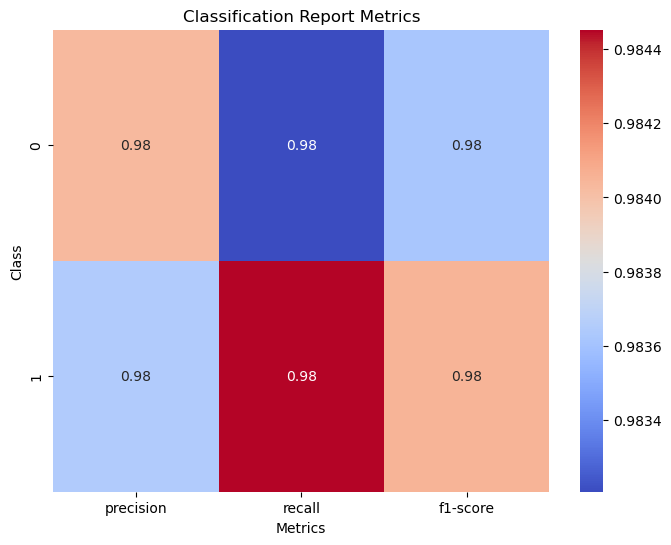

In [46]:
report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])
plt.figure(figsize=(8, 6))
sn.heatmap(class_metrics.drop('support',axis=1), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Output

In [47]:
emails = [
    'Hey raj, can we go for lunch tommorow?',
    'Wow! 20% discount on placements, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vect.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

# Save Model

In [48]:
import pickle
with open('spam_fil_model.pickle','wb') as f:
    pickle.dump(model,f)